In [ ]:
%matplotlib inline


# Embedding in Tk



Go!
Stop!
Stop!


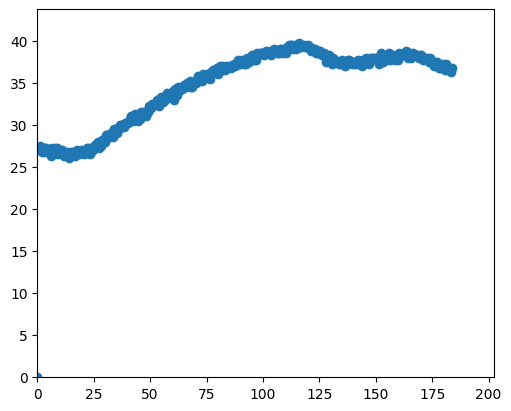

In [2]:
import tkinter

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
from matplotlib import animation
import matplotlib.pyplot as plt

import numpy as np
import numpy.random


root = tkinter.Tk()
root.wm_title("Embedding in Tk")

fig, ax = plt.subplots(figsize=(5, 4), dpi=100, layout='constrained')
# ax.set(xlim=(0, 1), ylim=(0, 1))
# ax.set(yscale='log')
sc = ax.scatter([], [])

canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)


def on_key_press(event):
    print("you pressed {}".format(event.key))
    key_press_handler(event, canvas, toolbar)


canvas.mpl_connect("key_press_event", on_key_press)

dead = True

def _go():
    print("Go!")
    global dead
    dead = False
    
def _stop():
    print("Stop!")
    global dead
    dead = True

def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate

buts = []
buts.append(go_but := tkinter.Button(master=root, text='Go!', command=_go))
buts.append(stop_but := tkinter.Button(master=root, text='Stop!', command=_stop))
buts.append(quit_but := tkinter.Button(master=root, text="Quit", command=_quit))
last_b = None
for b in buts:
    b.pack(side=tkinter.LEFT, expand=True)
    last_b = b

def init():
    sc.set_offsets([[0, 0], [0, 0]])
    return sc,

sleep_dur = 0.5
x = [0]
y = [0]
import serial
def animate(i):
    global dead
    if dead: return sc,
    
    temp_mask = 0xfff
    gain = 0.25
    with serial.Serial('/dev/ttyUSB1', baudrate=115200) as s:
        s.timeout = 2
        a, b = s.read(2)
        comb = (a << 8) | b
        masked = (comb >> 3) & temp_mask
        t = masked * gain
        
    x.append(x[-1] + sleep_dur)
    y.append(t)
    
    to_plot = np.array([x, y]).T
    sc.set_offsets(to_plot)
    ax.set(
        xlim=(np.min(to_plot[:,0])*0.9, np.max(to_plot[:,0])*1.1),
        ylim=(np.min(to_plot[:,1])*0.9, np.max(to_plot[:,1])*1.1)
    )
    return sc,
    
anim = animation.FuncAnimation(
    fig, animate, init_func=init, cache_frame_data=False, interval=int(sleep_dur * 1000), blit=False)

tkinter.mainloop()
# If you put root.destroy() here, it will cause an error if the window is
# closed with the window manager.